In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


In [2]:
import sys
import os

# Get the directory of the current notebook
current_dir = os.path.dirname(os.path.abspath('../scripts')) 

# Add the 'scripts' directory to the Python path
scripts_dir = os.path.join(current_dir, 'scripts')
sys.path.append(scripts_dir)
# import from data_utils
from data_utils import load_data, column_summary

In [3]:
# Load data 
file_path = r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Project5\Data\store.csv' 
df = load_data(file_path) 

In [4]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# Call column_summary function
summary_df = column_summary(df) 
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values
0,Store,int64,0,1115,1115
1,StoreType,object,0,1115,4
2,Assortment,object,0,1115,3
3,CompetitionDistance,float64,3,1112,654
4,CompetitionOpenSinceMonth,float64,354,761,12
5,CompetitionOpenSinceYear,float64,354,761,23
6,Promo2,int64,0,1115,2
7,Promo2SinceWeek,float64,544,571,24
8,Promo2SinceYear,float64,544,571,7
9,PromoInterval,object,544,571,3


In [7]:
# for convinence rename the columns

df.rename(columns={
    'Store': 'store_id',
    'StoreType': 'store_type',
    'Assortment': 'assortment_level',
    'CompetitionDistance': 'competition_distance_m', 
    'CompetitionOpenSinceMonth': 'competition_opened_month',
    'CompetitionOpenSinceYear': 'competition_opened_year',
    'Promo2': 'promo_active', 
    'Promo2SinceWeek': 'promo2_start_week',
    'Promo2SinceYear': 'promo2_start_year',
    'PromoInterval': 'promo_interval'
}, inplace=True)

In [8]:
df.describe()

,store_id,competition_distance_m,competition_opened_month,competition_opened_year,promo_active,promo2_start_week,promo2_start_year
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Checking and dealing with missing values

In [9]:
from data_utils import plot_missingno_matrix_bar

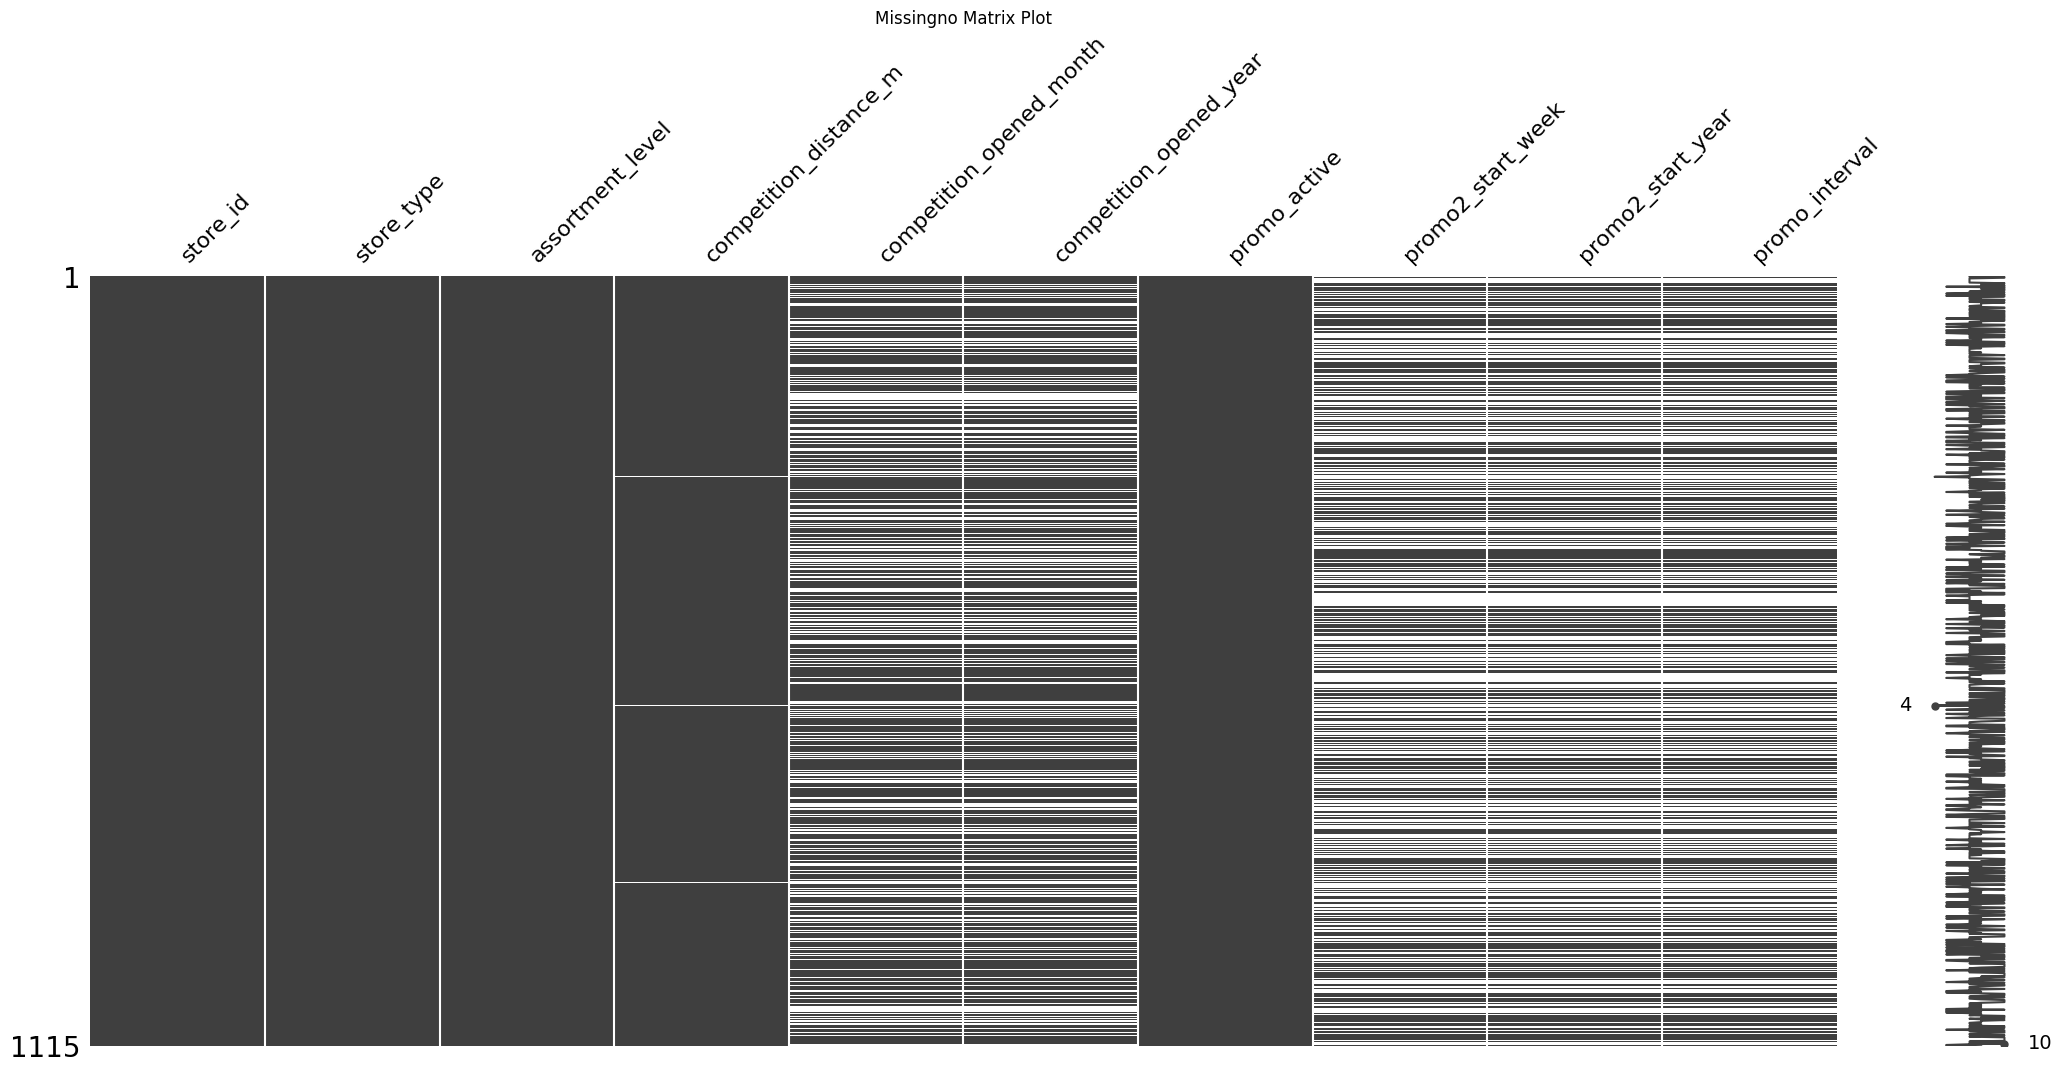

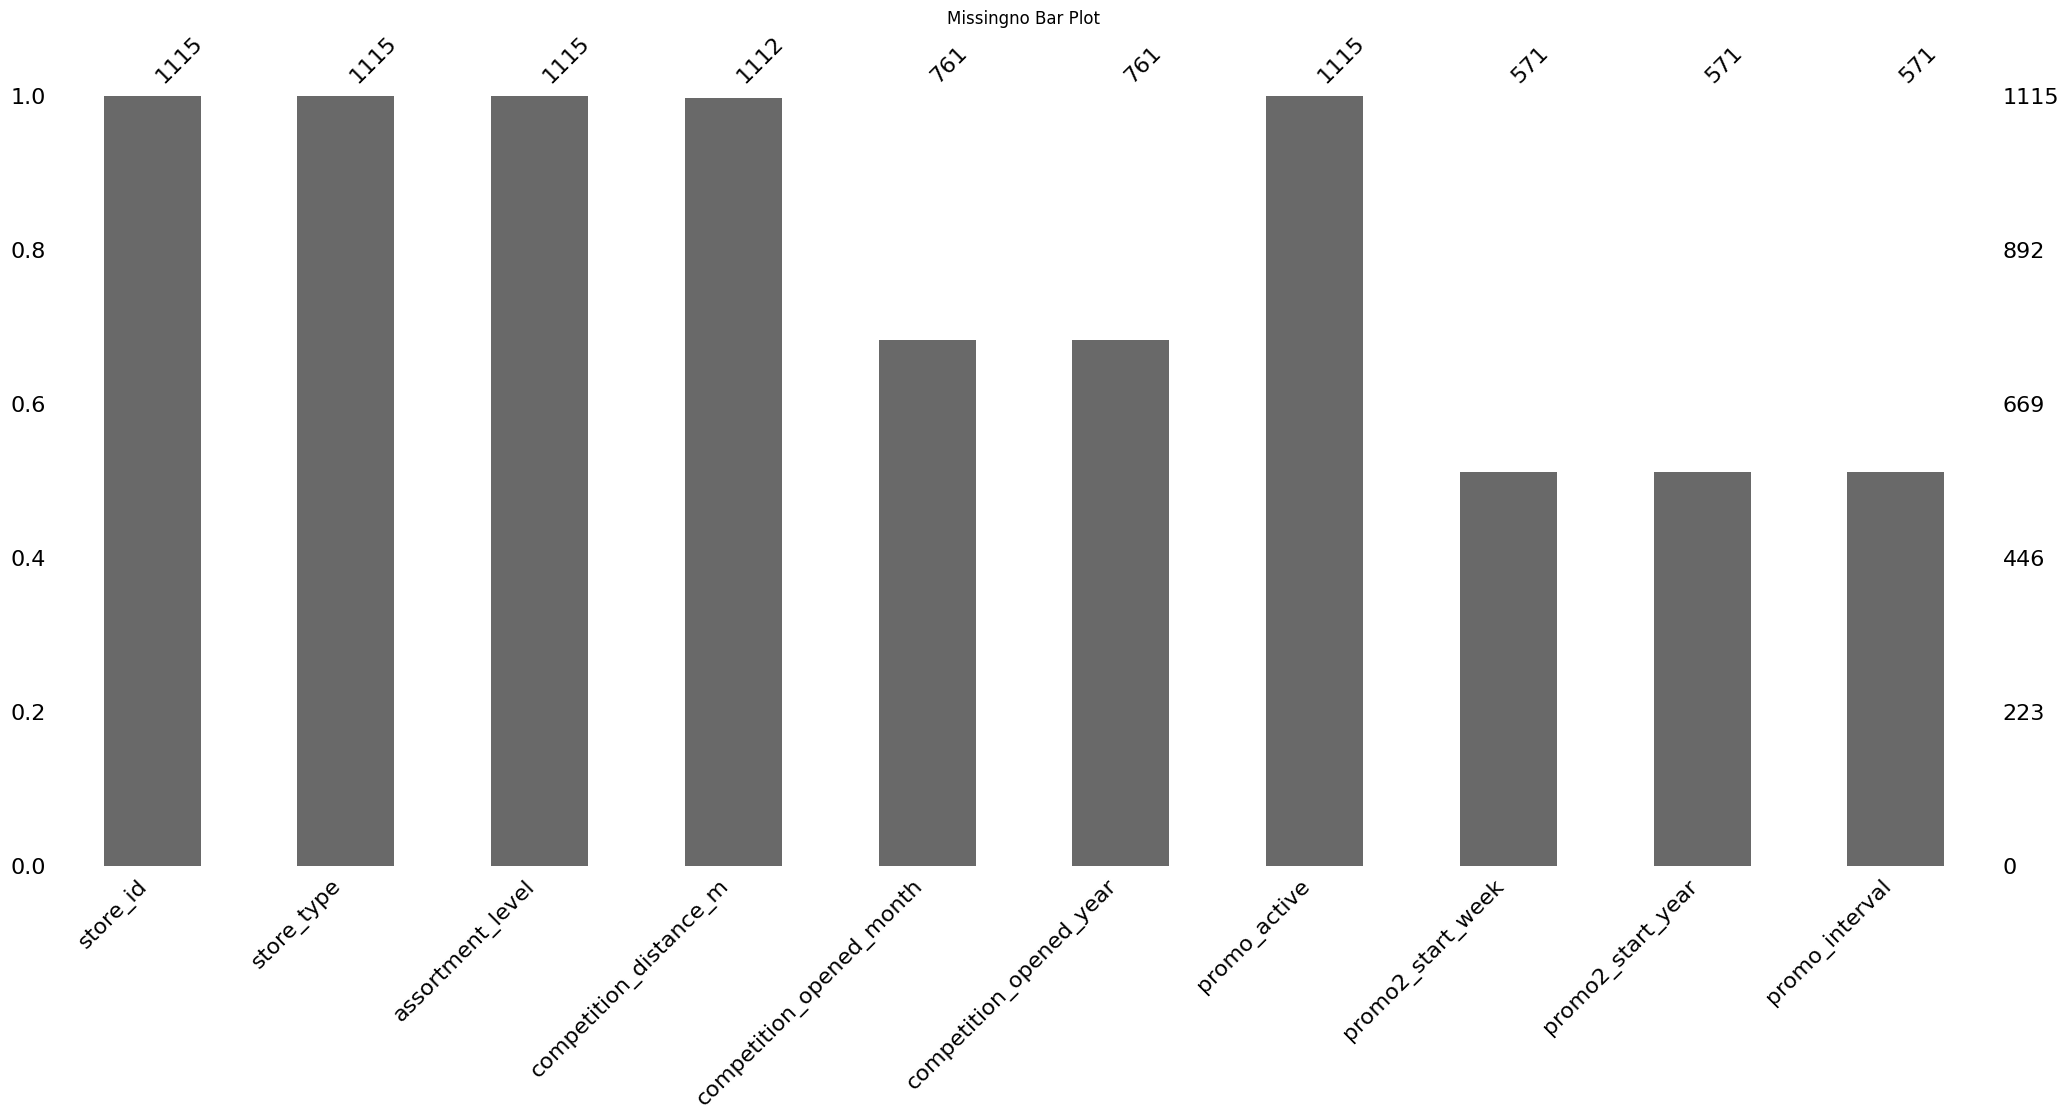

In [10]:
plot_missingno_matrix_bar(df)

In [11]:
from data_utils import filling_missing_values
filling_missing_values(df)

In [11]:
from data_utils import duplicates_info

In [12]:
duplicates = duplicates_info(df)
display((duplicates))

   store_id store_type assortment_level  competition_distance_m  competition_opened_month  competition_opened_year  promo_active  promo2_start_week  promo2_start_year   promo_interval
0         1          c                a                  1270.0                       9.0                   2008.0             0                NaN                NaN              NaN
1         2          a                a                   570.0                      11.0                   2007.0             1               13.0             2010.0  Jan,Apr,Jul,Oct
2         3          a                a                 14130.0                      12.0                   2006.0             1               14.0             2011.0  Jan,Apr,Jul,Oct
3         4          c                c                   620.0                       9.0                   2009.0             0                NaN                NaN              NaN
4         5          a                a                 29910.0                 

None

In [13]:
from data_utils import plot_countplot_assortment_level

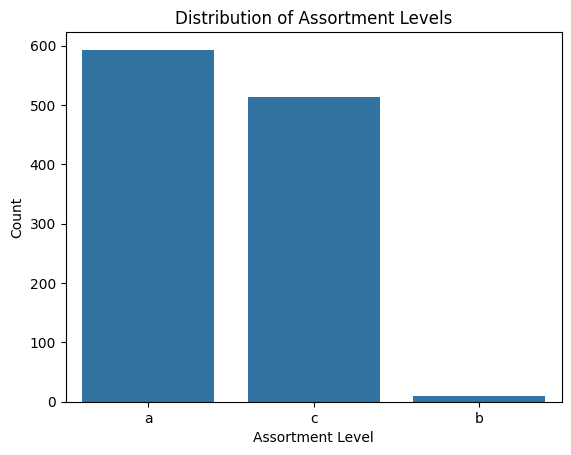

In [14]:
plot_countplot_assortment_level(df)

In [15]:
from data_utils import plot_histogram_competition_distance

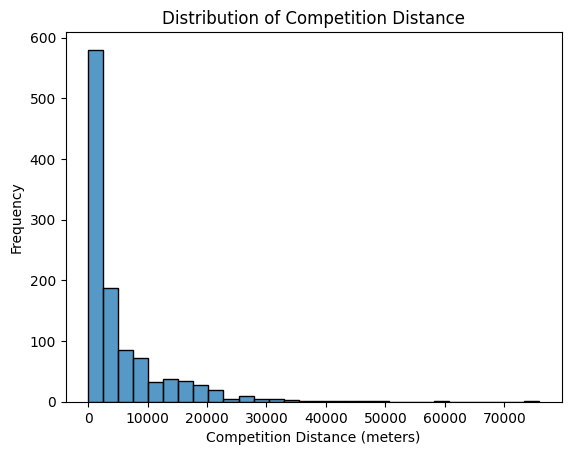

In [16]:
plot_histogram_competition_distance(df)

In [17]:
from data_utils import plot_countplot_competition_opened_month

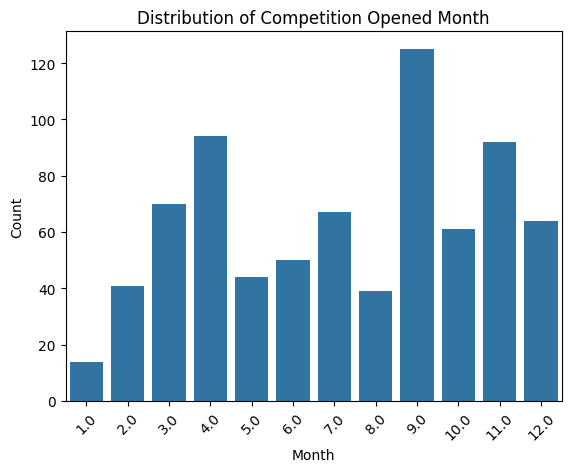

In [18]:
plot_countplot_competition_opened_month(df)

In [19]:
from data_utils import plot_countplot_competition_opened_year

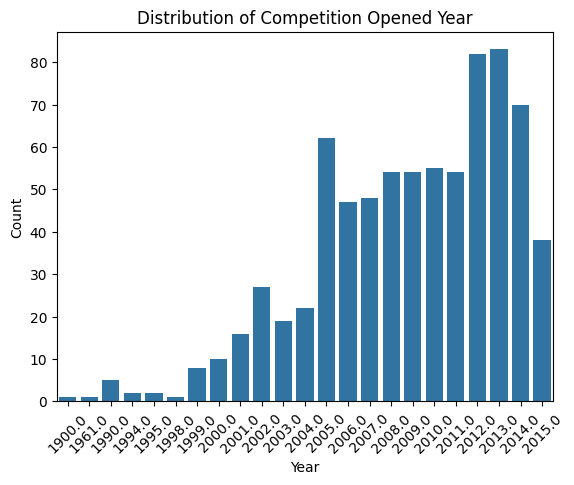

<Figure size 1500x600 with 0 Axes>

In [20]:
plot_countplot_competition_opened_year(df)

In [22]:
from data_utils import plot_countplot_promo_active

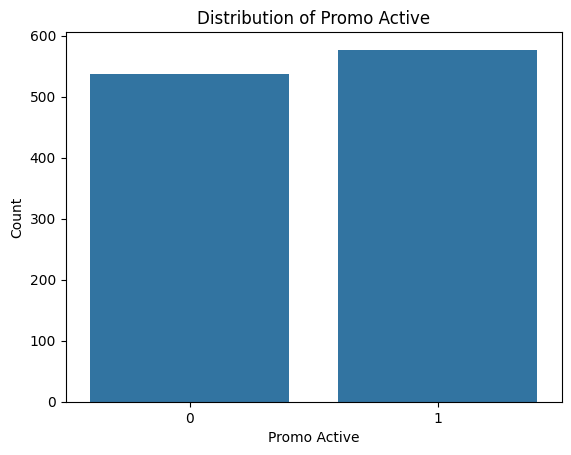

In [23]:
plot_countplot_promo_active(df.copy()) 

In [24]:
from data_utils import plot_countplot_promo2_start_week

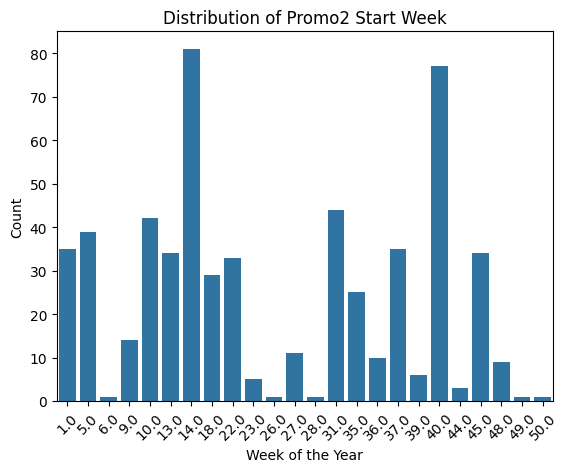

In [25]:
plot_countplot_promo2_start_week(df)

In [26]:
from data_utils import plot_countplot_promo2_start_year

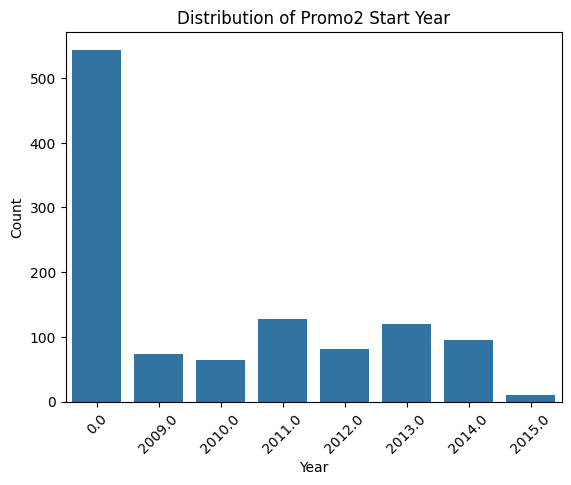

In [30]:
plot_countplot_promo2_start_year(df)

In [27]:
from data_utils import plot_countplot_promo_interval

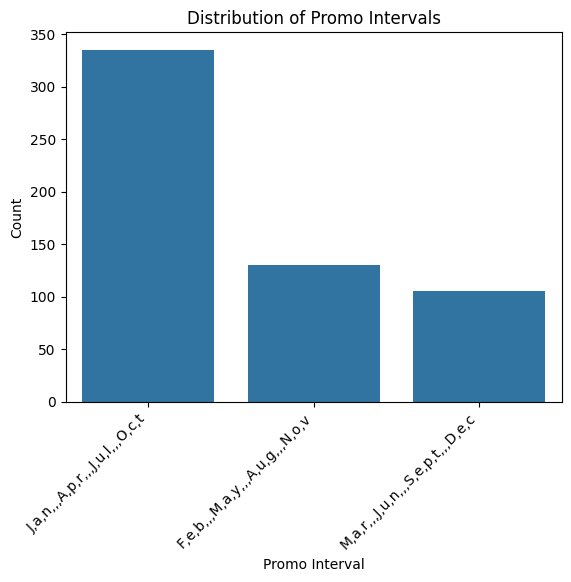

In [28]:
plot_countplot_promo_interval(df.copy())